### Описание проекта

Предоставлены данные о некоторых пользователях популярного сервиса аренды самокатов GoFast из несколько городов, а также об их поездках. Требуется проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

В основных данных есть информация о пользователях и подписках — `users_go.csv`

- `user_id` — уникальный идентификатор пользователя
- `name` — имя пользователя
- `age` — возраст
- `city` — город
- `subscription_type` — тип подписки (free, ultra)

Есть данные о поездках — `rides_go.csv`

- `user_id` — уникальный идентификатор пользователя
- `distance` — расстояние, которое пользователь проехал в текущей сессии (в метрах)
- `duration` — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- `date` — дата совершения поездки

Информация о подписках — `subscriptions_go.csv`

- `subscription_type` — тип подписки
- `minute_price` — стоимость одной минуты поездки по данной подписке
- `start_ride_price` — стоимость начала поездки
- `subscription_fee ` — стоимость ежемесячного платежа

### Загрузка данных

In [1]:
import pandas as pd # импортируем библиотеку pandas

In [2]:
users = pd.read_csv('/datasets/users_go.csv') # считываем данные о пользователях
rides = pd.read_csv('/datasets/rides_go.csv') # считываем данные о поездках
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv') # считываем данные описаний тарифов
display(users, rides, subscriptions) # вывод данных

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Посмотрим информацию о датасетах.

In [3]:
users.info()
rides.info()
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Col

Датафрейм `users` содержит 1565 строк и 5 столбцов с информацией о пользователях, типы данных приведены правильно.

Датафрейм `rides` содержит 18068 строк и 4 столбца с информацией о поездках.

В данных о пользователях указана информация: id пользователя, его имя, возраст, город, тип подписки.

В данных о поездках указано: id пользователя, дистанция поездки (метры), продолжительность поездки (минуты), дата поездки.

В данных описания указано: категории подписок, цена минуты поездки в зависимости от категории, начальная цена поездки в зависимости от категории, стоимость подключения категории.

### Предобработка данных

#### Данные о пользователях

##### Пропуски

Рассмотрим пропуски в данных.

In [4]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Пропусков нет, рассмотрим дубликаты.

##### Дубликаты

In [5]:
users.duplicated().sum()

31

Присутствует 31 дубликат, удалим их. 

In [6]:
users = users.drop_duplicates()

Проверим на всякий случай дубликаты только по столбцу `user_id`.

In [7]:
users['user_id'].duplicated().sum()

0

Дубликаты удалены.

##### Аномалии

Оценим распределение значений числовых ячеек.

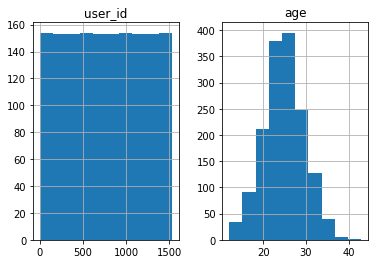

In [8]:
users.hist();

Числовые значения без аномалий, можно отметить, что большинству пользователей от 20 до 30 лет.

#### Данные о поездках

##### Приведение типов

Типы данных указаны правильно, кроме даты поездки. Приведем ее к типу `date`.

In [9]:
rides['date'] = pd.to_datetime(rides['date'])

Добавим столбец с номером месяца поездки.

In [10]:
rides['month'] = rides['date'].dt.month

Оценим, за какой период приведены данные.

In [11]:
print(rides['date'].min(), ':', rides['date'].max())

2021-01-01 00:00:00 : 2021-12-30 00:00:00


Приведены данные за период с первого января 2021 года по 30 декабря 2021 года.

##### Пропуски

Найдем пропуски в данных.

In [12]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Пропусков нет.

##### Дубликаты

Найдем дубликаты.

In [13]:
rides.duplicated().sum()

0

Дубликатов нет.

##### Аномалии

Оценим распределение значений ячеек.

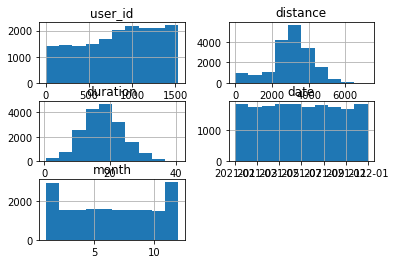

In [14]:
rides.hist();

Выраженных аномалий нет, можно отметить:
- некоторые пользователи ездят чаще других;
- обычно пользователи ездят от 2000 до 4000 метров:
- среднее время поездки в пределах 20 минут.

Проверим аномалии исходя из скорости самоката. Создадим столбец со средней скоростью поездки.

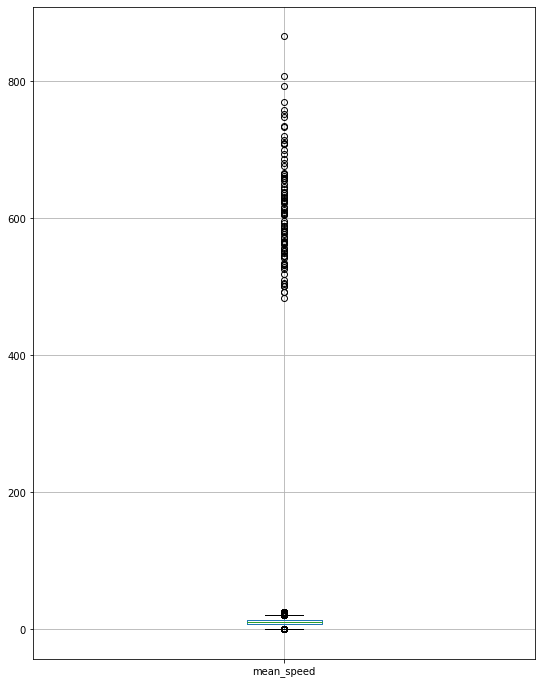

In [15]:
rides['mean_speed'] = (rides['distance'] / 1000) / (rides['duration'] / 60)
rides.boxplot('mean_speed', figsize=(9, 12));

Некоторые пользователи ездили со скоростью выше 400 км/ч, посчитаем сколько таких строк.

In [16]:
rides.query('mean_speed > 400')['user_id'].count()

95

Всего 95 поездок, создадим отдельный датафрейм, который будем использовать для исследовательского анализа, оригинальный оставим для расчета выручки.

In [17]:
good_rides = rides.query('mean_speed < 400')

Поездки с очень маленькой средней скоростью оставим, т.к. неизвестно, простаивал ли большую часть времени самокат или просто человек медленно ехал.

### Исследовательский анализ данных

#### Частота встречаемости городов

Подсчитаем количество пользователей в разных городах.

In [18]:
city_users_count = users.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)
city_users_count

,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


Распределение получилось примерно одинаковое по городам.

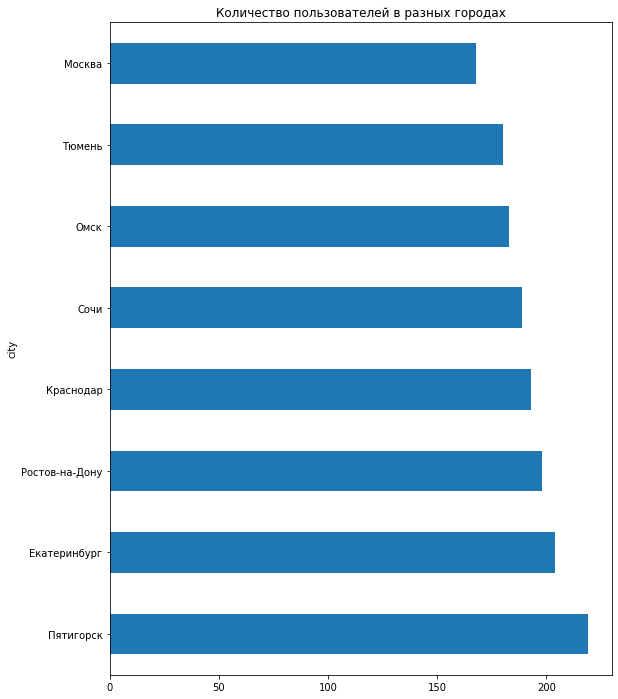

In [19]:
city_users_count.plot.barh(figsize=(9,12), title='Количество пользователей в разных городах', legend=False);

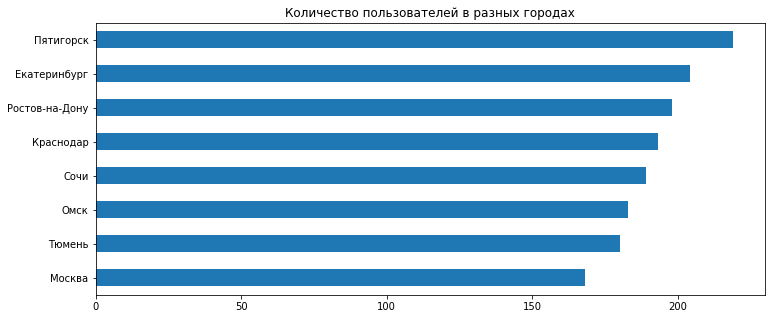

In [50]:
# Код ревьюера
users['city'].value_counts(ascending = True).plot(figsize = (12, 5),
                      kind = 'barh',
                      title='Количество пользователей в разных городах', legend=False)
plt.show()

#### Соотношение пользователей с подпиской и без

In [20]:
subscription_type_user_count = users.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
subscription_type_user_count

,user_id
subscription_type,
free,835
ultra,699


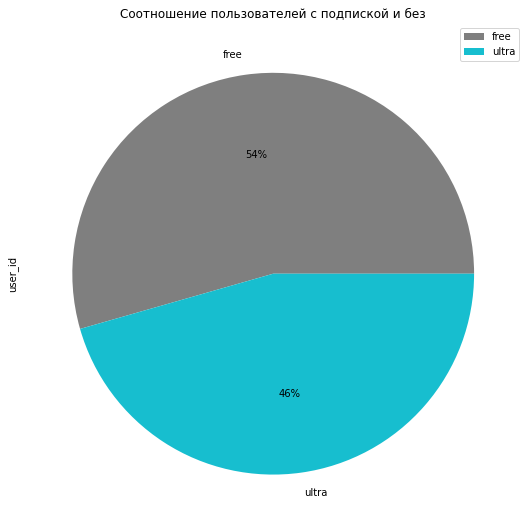

In [21]:
colors = ['tab:grey', 'tab:cyan']
subscription_type_user_count.plot(kind='pie', y='user_id', figsize=(9, 12), autopct='%1.0f%%', colors=colors,
                                 title='Соотношение пользователей с подпиской и без');

Бесплатная подписка у 54% пользователей, остальные обладают подпиской "Ультра"

#### Возраст пользователей

Оценим распределение возрастов среди пользователей.

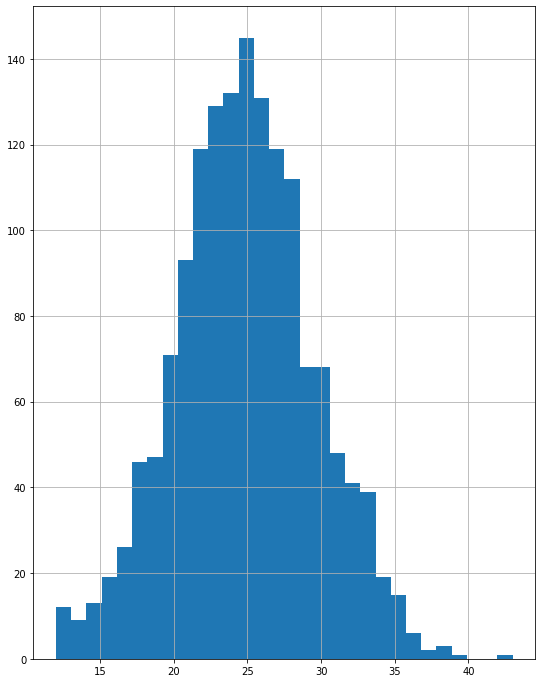

In [22]:
users['age'].hist(bins=30, figsize=(9, 12));

По гистограмме видно, что большинству пользователей 25 лет, остальные нормально распределены вокруг этого значения.

Запросим описание столбца.

In [23]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Максимальный возраст пользователя в выборке — 43, минимальный — 12 лет. Среднее значение — 24,9 лет. Стоит отметить, что среднее и медиана по сути одинаковы. Большая часть пользователей младше 28 лет.

#### Расстояние за одну поездку

Оценим расстояния, которые проезжают пользователи.

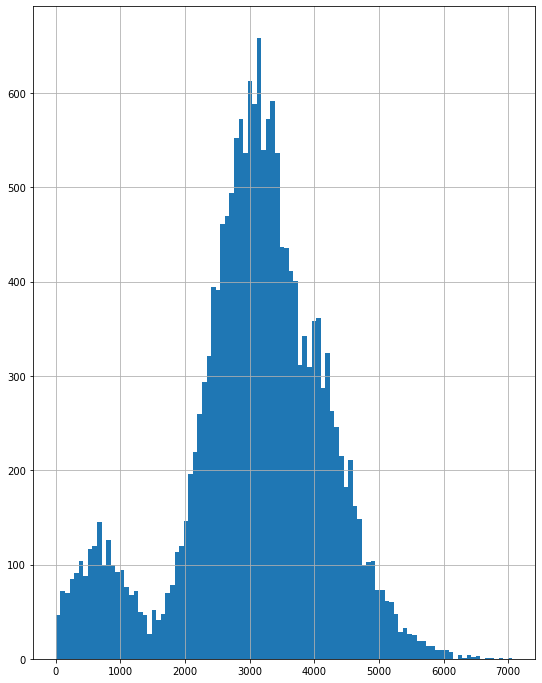

In [24]:
good_rides['distance'].hist(figsize=(9, 12), bins=100);

Можно заметить два пика: небольшой в поездках до 1 километра, и побольше в районе 3 километров. В основном пользователи ездят до 5 километров.

Опишем столбец.

In [25]:
good_rides['distance'].describe()

count    17973.000000
mean      3059.863833
std       1108.814612
min          0.855683
25%       2538.839628
50%       3129.029255
75%       3762.636244
max       7066.003772
Name: distance, dtype: float64

Как и в случае с возрастом, медиана и среднее почти совпали, 75 процентов значений лежат до 4 километров.

#### Продолжительность поездок

Оценим распределение продолжительности поездок.

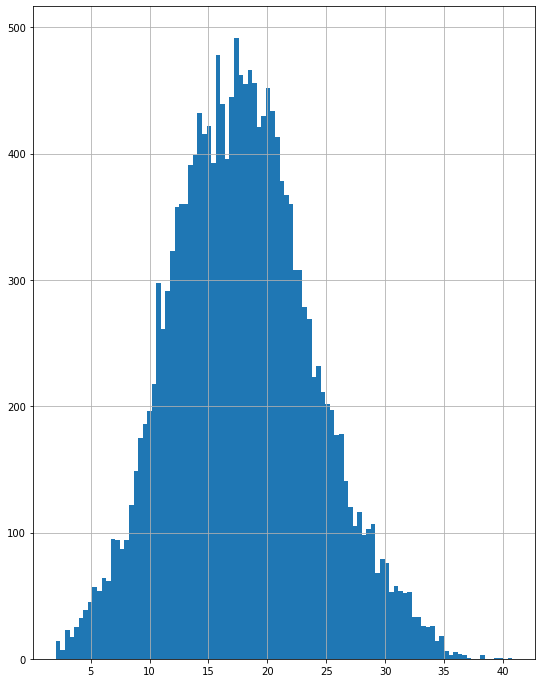

In [26]:
good_rides['duration'].hist(figsize=(9, 12), bins=100);

Время поездок распределено нормально со средним значением примерно 20 минут, опишем столбец.

In [27]:
good_rides['duration'].describe()

count    17973.000000
mean        17.896480
std          5.975424
min          2.035632
25%         13.670439
50%         17.714122
75%         21.747016
max         40.823963
Name: duration, dtype: float64

Как и прежде среднее и медиана почти совпали — 18 минут. Самая короткая поездка составила 2 минуты, самая долгая — почти 41 минуту. Большая часть значений лежит в пределах 22 минут.

### Объединение данных

Объединим датафреймы с информацией о пользователях и их поездками. Объединять будем внутренне, по `user_id`. Объединим дважды, для хороших данных и оригинальных.

In [28]:
users_rides = users.merge(rides, on='user_id')
good_users_rides = users.merge(good_rides, on='user_id')
users_rides

,user_id,name,age,city,subscription_type,distance,duration,date,month,mean_speed
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,10.335841
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,9.929620
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,7.260713
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,8.734644
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,9.202888
...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,11.444601
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,7.960158
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,12.452969
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,10.443489


Проверим итоговую размерность и наличие пропусков.

In [29]:
users_rides.info()
print()
good_users_rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   mean_speed         18068 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 1.5+ MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17973 entries, 0 to 17972
Data columns (total 10 columns):
 #   Column             Non-Null Count  

Итоговый оригинальный датафрейм получился длиной в 18068 строк, что соответствует исходному датафрейму `rides`. Пропусков нет ни в одном столбце.

Создадим хорошие и аномальные датафреймы. Два с пользователями без подписки, два с подпиской.

In [30]:
free_users = users_rides.query('subscription_type == "free"') # датасет с пользователями без подписки
ultra_users = users_rides.query('subscription_type == "ultra"') # датасет с пользователями, имеющими подписку
good_free_users = good_users_rides.query('subscription_type == "free"') # хороший датасет с пользователями без подписки 
good_ultra_users = good_users_rides.query('subscription_type == "ultra"') # хороший датасет с пользователями, имеющими подписку

Визуализируем данные пользователей с подпиской и без по расстоянию поездок по хорошим данным.

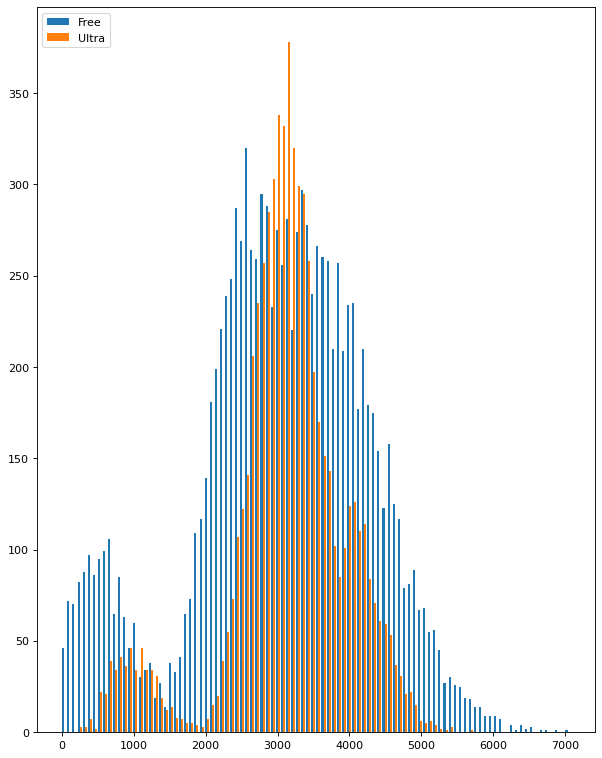

In [31]:
import matplotlib.pyplot as plt # импортируем библиотеку для графиков
from matplotlib.pyplot import figure # импортируем figure, чтобы указать размер гистограммы

figure(figsize=(9, 12), dpi=80)
plt.hist([good_free_users['distance'], good_ultra_users['distance']], bins=100, label=['Free','Ultra']);
plt.legend(loc='upper left')
plt.show();

В целом распределение оказалось похожим, но есть отличия:
- пользователи с подпиской реже совершают короткие поездки (до 1 км);
- пользователи с подпиской в основном ездят на расстояние 3 км.

Опишем численно данные о дистанции.

In [32]:
good_free_users['distance'].describe()

count    11473.000000
mean      3028.374239
std       1235.541051
min          0.855683
25%       2360.878149
50%       3102.083025
75%       3883.979311
max       7066.003772
Name: distance, dtype: float64

In [33]:
good_ultra_users['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

Среднее и медиальное значение у пользователей различных категорий почти одинаково.

Оценим распределение по продолжительности поездки для этих категорий.

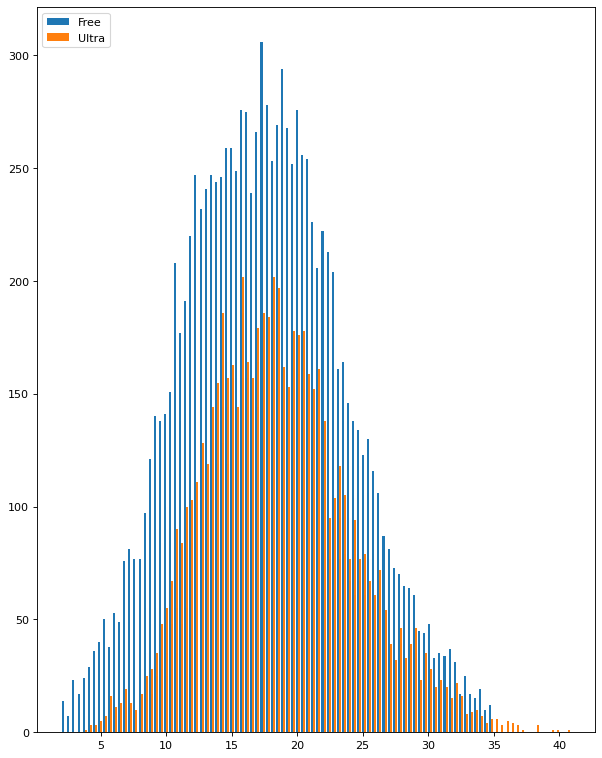

In [34]:
figure(figsize=(9, 12), dpi=80)
plt.hist([good_free_users['duration'], good_ultra_users['duration']], bins=100, label=['Free','Ultra']);
plt.legend(loc='upper left')
plt.show();

Здесь тоже без радикальных отличий в относительном выражении, у обладатей платной подписки нормализация времени поездок сужается. Оценим численно.

In [35]:
good_free_users['duration'].describe()

count    11473.000000
mean        17.530771
std          6.162609
min          2.035632
25%         13.085688
50%         17.383807
75%         21.638038
max         34.948498
Name: duration, dtype: float64

In [36]:
good_ultra_users['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

Также среднее и медиана совпадают.

### Подсчёт выручки

Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя из разных категорий за каждый месяц.
Датафрейм `free_users_month_rides` для пользователей без подписки и `ultra_users_month_rides` с подпиской. Для этого нужно округлить минуты поездки в большую сторону до целого числа.

In [37]:
import numpy as np # импортируем библиотеку numpy

free_users['duration'] = np.ceil(free_users['duration']) # округляем время поездки до целого числа в большую сторону
# создаем сводную таблицу по месяцам и user_id, со значениями дистанции и 
# времени поездки, по которым рассчитываем сумму и их количество
free_users_month_rides = free_users.pivot_table(index=['month', 'user_id'], values=['distance', 'duration'], \
                                     aggfunc={'distance': ['count', 'sum'], 'duration' : 'sum'}).reset_index()

columns = ['month', 'user_id', 'rides_count', 'distance_sum', 'duration_sum'] # создаем список с новыми названиями таблицы
free_users_month_rides.columns = columns # записываем новые названия столбцов для сводной таблицы
free_users_month_rides

/tmp/ipykernel_138/3409949322.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free_users['duration'] = np.ceil(free_users['duration']) # округляем время поездки до целого числа в большую сторону


,month,user_id,rides_count,distance_sum,duration_sum
0,1,700,1,2515.690719,15.0
1,1,701,1,2676.472894,18.0
2,1,702,1,903.861985,16.0
3,1,703,1,3406.580225,24.0
4,1,704,1,3197.139639,18.0
...,...,...,...,...,...
6793,12,1525,1,4597.854350,34.0
6794,12,1526,1,3644.121544,23.0
6795,12,1528,1,3998.569324,11.0
6796,12,1532,2,6111.889853,42.0


То же самое делаем для пользователей с подпиской.

In [38]:
ultra_users['duration'] = np.ceil(ultra_users['duration'])

ultra_users_month_rides = ultra_users.pivot_table(index=['month', 'user_id'], values=['distance', 'duration'], \
                                     aggfunc={'distance': ['count', 'sum'], 'duration' : 'sum'}).reset_index()

columns = ['month', 'user_id', 'rides_count', 'distance_sum', 'duration_sum']
ultra_users_month_rides.columns = columns
ultra_users_month_rides

/tmp/ipykernel_138/1086539596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ultra_users['duration'] = np.ceil(ultra_users['duration'])


,month,user_id,rides_count,distance_sum,duration_sum
0,1,1,2,7027.511294,42.0
1,1,3,1,3061.777147,13.0
2,1,5,1,3914.646990,13.0
3,1,7,2,6478.080979,28.0
4,1,12,1,3577.151148,33.0
...,...,...,...,...,...
4528,12,688,1,4004.404223,24.0
4529,12,689,1,3387.343067,19.0
4530,12,692,1,2947.000211,15.0
4531,12,694,1,3591.099488,18.0


Рассчитаем стоимость поездок для пользователей пользуясь датафреймом `subscriptions`.

Напишем функцию, которая будет считать выручку.

In [39]:
def revenue(data, subscription_type):
    if subscription_type == 'free':
        gain = subscriptions.loc[0, 'minute_price'] * data['duration_sum'] + \
        subscriptions.loc[0, 'start_ride_price'] * data['rides_count'] + \
        subscriptions.loc[0, 'subscription_fee']
        return gain
    gain = subscriptions.loc[1, 'minute_price'] * data['duration_sum'] + \
        subscriptions.loc[1, 'start_ride_price'] * data['rides_count'] + \
        subscriptions.loc[1, 'subscription_fee']
    return gain

Посчитаем выручку от пользователей с подпиской и без.

In [40]:
free_users_month_rides['revenue'] = free_users_month_rides.apply(lambda x: revenue(x, 'free'), axis=1)
ultra_users_month_rides['revenue'] = ultra_users_month_rides.apply(lambda x: revenue(x, 'ultra'), axis=1)

In [41]:
display(free_users_month_rides, ultra_users_month_rides)

,month,user_id,rides_count,distance_sum,duration_sum,revenue
0,1,700,1,2515.690719,15.0,170.0
1,1,701,1,2676.472894,18.0,194.0
2,1,702,1,903.861985,16.0,178.0
3,1,703,1,3406.580225,24.0,242.0
4,1,704,1,3197.139639,18.0,194.0
...,...,...,...,...,...,...
6793,12,1525,1,4597.854350,34.0,322.0
6794,12,1526,1,3644.121544,23.0,234.0
6795,12,1528,1,3998.569324,11.0,138.0
6796,12,1532,2,6111.889853,42.0,436.0


,month,user_id,rides_count,distance_sum,duration_sum,revenue
0,1,1,2,7027.511294,42.0,451.0
1,1,3,1,3061.777147,13.0,277.0
2,1,5,1,3914.646990,13.0,277.0
3,1,7,2,6478.080979,28.0,367.0
4,1,12,1,3577.151148,33.0,397.0
...,...,...,...,...,...,...
4528,12,688,1,4004.404223,24.0,343.0
4529,12,689,1,3387.343067,19.0,313.0
4530,12,692,1,2947.000211,15.0,289.0
4531,12,694,1,3591.099488,18.0,307.0


Таким образом мы расчитали выручку с каждого пользователя по месяцам.

### Проверка гипотез

#### "Тратят ли пользователи с подпиской больше времени на поездки?"

Приведены два датасета с пользователями: пользователи с подпиской и без подписки. Будем расчитывать статистическое среднее исходя из этих двух выборок и сравнивать их между собой.

- Нулевая гипотеза H0: пользователи из разных категорий тратят в среднем одинаковое количество времени на поездки.
- Альтернативная гипотеза H1: пользователи с подпиской тратят больше времени на поездки.

In [43]:
from scipy import stats as st # импортируем библиотеку stats
alpha = 0.05 # устанавливаем уровень статистической значимости
results = st.ttest_ind(
    ultra_users['duration'], 
    free_users['duration'], 
    alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


**`Нулевая гипотеза отвергнута, скорее всего пользователи с подпиской тратят больше времени на поездки.`**

#### "Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?"

- Нулевая гипотеза H0: пользователи с подпиской проезжают в среднем 3130 метров за одну поездку.
- Альтернативная гипотеза H1: пользователи с подпиской проезжают в среднем меньше 3130 метров.

In [44]:
mean_distance = 3130

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(
    ultra_users['distance'], 
    mean_distance,
    alternative='less')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.08046311521502146
Не отвергаем нулевую гипотезу


**`Нулевая гипотеза не отвергнута, возможно, пользователи с подпиской проезжают в среднем 3130 метров. Попробуем проверить гипотезу в другую сторону:`**
- пользователи с подпиской проезжают в среднем больше 3130 метров.

In [45]:
results = st.ttest_1samp(
    ultra_users['distance'], 
    mean_distance,
    alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


**`Нулевая гипотеза так и не была отвергнута, значит в среднем пользователи с подпиской проезжают 3130 метров.`**

#### "Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?"

Проверяем гипотезы:
- Нулевая гипотеза H0: выручка от пользователей с подпиской равна выручке от пользователей без подписки.
- Альтернативная гипотеза H1: выручка от пользователей с подпиской больше выручки от пользователей без подписки.

In [46]:
alpha = 0.05 # устанавливаем уровень статистической значимости
results = st.ttest_ind(
    ultra_users_month_rides['revenue'], 
    free_users_month_rides['revenue'], 
    alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


**`Нулевая гипотеза отвергнута, пользователи с подпиской приносят в среднем больше выручки, чем пользователи без подписки`**

#### "Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?"

В данном случае, лучше всего бы подошла проверка гипотезы о равнестве средних для зависимых выборок. Чтобы проверить такую гипотезу можно применить метод `scipy.stats.ttest_rel()`.
Ему достаточно передать два параметра: наборы данных до и после. Оба набора должны быть одинаковыми по размеру: каждое измерение должно быть проведено до и после изменения.

Краткий ответ: понадобился бы односторонний t-тест.

### Распределения

#### Задача 1

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соотвествующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10% пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Задача носит характер биномиального распределения. Для решения необходимо задать его параметры: количество испытаний, вероятность успеха. Мы создадим цикл, в котором будем увеличивать количество испытаний, пока не достигнем необходимой вероятности не выполнить план.

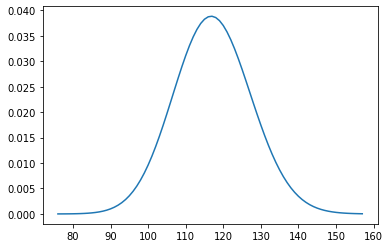

1172


In [52]:
from scipy.stats import binom # импортируем библиотеку для нормального распределения
from math import sqrt # импортируем функцию квадратного корня

n = 100 # количество испытаний
p = 0.10 # вероятность успешного исхода
k = 100 # необходимое количество успехов
success = 0.05 # необходимая вероятность не выполнить план
while binom.cdf(k, n, p) > success:
    n += 1

# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
mu = n * p
sigma = n * p * (1 - p)
left = int(mu - 4 * sqrt(sigma))
right = int(mu + 4 * sqrt(sigma))
 
# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))
# рисуем график биномиального распределения
ax = plt.subplot()
# используем синие о-образные маркеры и размер маркера 1
binom = st.binom.pmf(x, n, p)
ax.plot(x, binom, ms=1)
plt.show()
print(n)

**`Увеличивая количество испытаний было выявлено, что при вероятности успеха 10%, для достижения 100 успехов с вероятностью не получить их 5%, необходимо 1172 испытаний. То есть, чтобы 100 пользователей продлили подписку по промокоду с вероятностью 95%, необходимо разослать промокод 1172 клиентам.`**

#### Задача 2

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [ ]:
# задаём параметры биномиального распределения
n = 1_000_000
p = 0.4

# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
mu = n * p
sigma = n * p * (1 - p)
left = int(mu - 4 * sqrt(sigma))
right = int(mu + 4 * sqrt(sigma))
 
# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))
# рисуем график биномиального распределения
ax = plt.subplot()
# используем синие о-образные маркеры и размер маркера 1
binom = st.binom.pmf(x, n, p)
ax.plot(x, binom, ms=1)
plt.show()
distr = st.norm(mu, sqrt(sigma))
result = distr.cdf(399_500)
result

**`Вероятность, что уведомление откроют не более 399,5 тыс. пользователей составляет 15%.`**

### Выводы

В данной работе был произведен анализ данных популярного сервиса по аренде самокатов GoFast.

Датасеты были проверены на наличие пропусков, дубликатов, аномальных значений, были приведены некоторые типы данных.

Большая часть данных имела нормальное распределение с выраженным средним значением. Выяснилось, что пользователи с подпиской в целом мало чем отличаются от пользователей без подписки в эксплуатации самокатов. Было выдвинуто и проверено несколько гипотез:
- в среднем пользователи с подпиской арендуют самокаты на более длительное время;
- в среднем пользователи с подпиской проезжают 3130 метров;
- в среднем пользователи с подпиской приносят больше выручки сервису, чем пользователи без подписки.


Были решены несколько маркетинговых задач, связанных с биномиальным распределением:
- чтобы с вероятностью 95% сотня людей купила подписку, требуется разослать 1172 промокодов;
- если разослать уведомление одному миллиону пользователей, то вероятность, что его откроют не более 399,5 тыс. пользователей составляет 15%.

Бизнес вывод: пользователи с подпиской являются более выгодными клиентами, т.к. приносят в среднем больше выручки.